In [1]:
#importing all the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPool2D,Dropout,Activation
from keras.utils import np_utils

In [2]:
#reading the data
ds = pd.read_csv("D:/Users/chira/Desktop/machine_learning/new_data/mnist/train.csv")
data = ds.values[:10000]

In [3]:
#extracting data into labels
X = data[:,1:]/255.0
y = np_utils.to_categorical(data[:,0])

print(X.shape,y.shape)

(10000, 784) (10000, 10)


In [16]:
#splitting data in training and testing data
split = int(0.8*X.shape[0])

X_train = X[:split].reshape(-1,28,28,1)
X_test = X[split:].reshape(-1,28,28,1)

y_train = y[:split]
y_test = y[split:]

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8000, 28, 28, 1) (2000, 28, 28, 1)
(8000, 10) (2000, 10)


In [17]:
# Building the CNN mdoel

model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))

model.add(Convolution2D(16,(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(8,(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_18 (Activation)   (None, 10, 10, 8)         0         
__________

In [19]:
# testing the model
hist = model.fit(X_train,y_train,
                epochs=100,
                shuffle = True,
                batch_size=100,
                validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.1960 - acc: 0.9368 - val_loss: 0.1113 - val_acc: 0.9675
Epoch 2/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.1818 - acc: 0.9448 - val_loss: 0.1032 - val_acc: 0.9705
Epoch 3/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.1668 - acc: 0.9465 - val_loss: 0.0910 - val_acc: 0.9735
Epoch 4/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.1761 - acc: 0.9464 - val_loss: 0.0950 - val_acc: 0.9715
Epoch 5/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.1646 - acc: 0.9504 - val_loss: 0.0969 - val_acc: 0.9715
Epoch 6/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.1498 - acc: 0.9509 - val_loss: 0.0885 - val_acc: 0.9725
Epoch 7/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.1565 - acc: 0.9499 - val_loss: 0.0875 - val_acc: 

8000/8000 [==============================] - 1s 146us/step - loss: 0.0746 - acc: 0.9728 - val_loss: 0.0525 - val_acc: 0.9825
Epoch 61/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.0686 - acc: 0.9781 - val_loss: 0.0458 - val_acc: 0.9835
Epoch 62/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.0699 - acc: 0.9768 - val_loss: 0.0465 - val_acc: 0.9845
Epoch 63/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.0717 - acc: 0.9764 - val_loss: 0.0441 - val_acc: 0.9855
Epoch 64/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.0670 - acc: 0.9785 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 65/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.0652 - acc: 0.9778 - val_loss: 0.0477 - val_acc: 0.9855
Epoch 66/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.0705 - acc: 0.9765 - val_loss: 0.0493 - val_acc: 0.9835
Epoch 67/100
8000/8000 [=======================

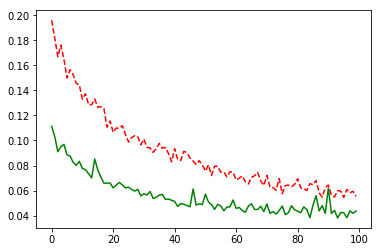

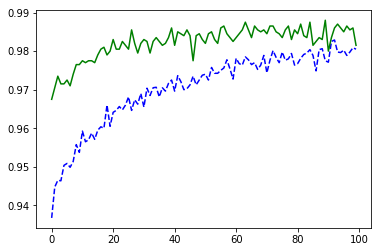

In [26]:
# plots ogf loss and accuracy
history = hist.history

plt.figure(0)
plt.plot(history['loss'],'r--')
plt.plot(history['val_loss'],'g')


plt.figure(1)
plt.plot(history['acc'],'b--')
plt.plot(history['val_acc'],'g')